In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("./Income1.csv",index_col="Unnamed: 0")
data.head()

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


In [3]:
data = data.sample(len(data))#乱序，原始数据label为连续型，递增

In [4]:
data.head()

,Education,Income
12,14.535117,41.497994
18,17.023411,61.336621
8,12.889632,25.507885
27,20.755853,72.486055
9,13.290970,36.884595


In [5]:
data.describe()

,Education,Income
count,30.000000,30.000000
mean,16.000000,50.145469
std,3.642965,21.141553
min,10.000000,15.192634
25%,12.989967,29.078897
50%,16.000000,49.871749
75%,19.010033,71.140149
max,22.000000,80.260571


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 12 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
 1   Income     30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


# 3.特征标签分离

In [7]:
X = data['Education']
y = data['Income']

# 导入数据集划分库

In [8]:
from sklearn.model_selection import KFold,ShuffleSplit,StratifiedKFold

# 5. 可视化K折划分，K = 5

训练集索引-1 [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
测试集索引-1 [0 1 2 3 4 5]
训练集索引-2 [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
测试集索引-2 [ 6  7  8  9 10 11]
训练集索引-3 [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29]
测试集索引-3 [12 13 14 15 16 17]
训练集索引-4 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29]
测试集索引-4 [18 19 20 21 22 23]
训练集索引-5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
测试集索引-5 [24 25 26 27 28 29]


Text(0.5, 0, 'index')

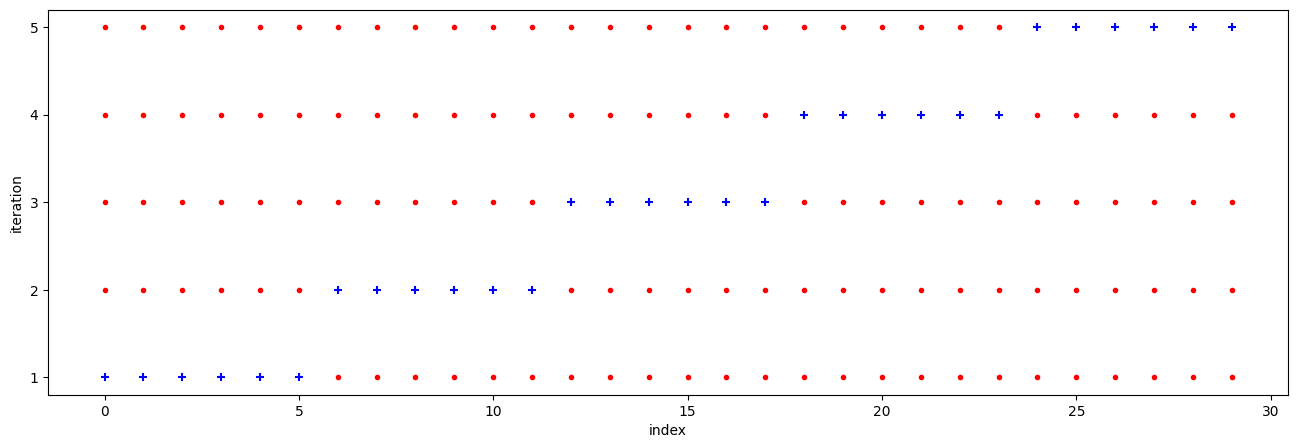

In [9]:
kf = KFold(n_splits=5)
kf_cv= kf.split(X)
k = 1
plt.figure(figsize=(16,5))
for train_indices,test_indices in kf_cv:
    plt.scatter(train_indices,[k]*len(train_indices),marker=".",c="r")
    plt.scatter(test_indices,[k]*len(test_indices),marker="+",c="b")
    print("训练集索引-%d"%k,train_indices)
    print("测试集索引-%d"%k,test_indices)
    k+=1
    
plt.yticks([i for i in range(1,6)],["1","2","3","4","5"])
plt.ylabel("iteration")
plt.xlabel("index")

# 6.可视化乱序后，K折划分，k=5

训练集索引-1 [ 0  1  4  6  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25 26 27 28 29]
测试集索引-1 [ 2  3  5  7 20 21]
训练集索引-2 [ 0  2  3  4  5  6  7  8  9 10 11 15 16 17 18 20 21 22 23 24 25 26 28 29]
测试集索引-2 [ 1 12 13 14 19 27]
训练集索引-3 [ 0  1  2  3  4  5  7  8  9 10 12 13 14 15 16 17 19 20 21 22 25 26 27 29]
测试集索引-3 [ 6 11 18 23 24 28]
训练集索引-4 [ 0  1  2  3  4  5  6  7  9 11 12 13 14 15 16 17 18 19 20 21 23 24 27 28]
测试集索引-4 [ 8 10 22 25 26 29]
训练集索引-5 [ 1  2  3  5  6  7  8 10 11 12 13 14 18 19 20 21 22 23 24 25 26 27 28 29]
测试集索引-5 [ 0  4  9 15 16 17]


Text(0.5, 0, 'index')

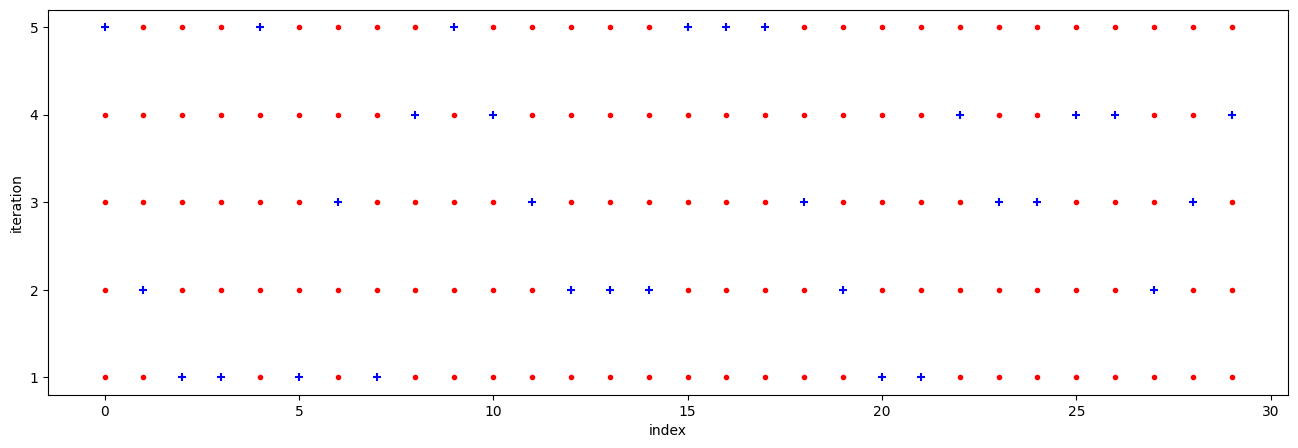

In [10]:
# 每次选其中一折作为测试集，其他为训练集
kfs = KFold(n_splits=5,random_state=10,shuffle=True)
kfs_cv = kfs.split(X)
k = 1
plt.figure(figsize=(16,5))
for train_indices,test_indices in kfs_cv:
    plt.scatter(train_indices,[k]*len(train_indices),marker='.',c='r')
    plt.scatter(test_indices,[k]*len(test_indices),marker='+',c='b')
    print("训练集索引-%d"%k,train_indices)
    print("测试集索引-%d"%k,test_indices)
    k+=1
    
plt.yticks([i for i in range(1,6)],["1","2","3","4","5"])
plt.ylabel("iteration")
plt.xlabel("index")

# 可视化层次K折划分，K=3

In [11]:
from sklearn.preprocessing import Binarizer

In [12]:
Bi_ = Binarizer(threshold=50)
y1 = Bi_.fit_transform(data[["Income"]])#y1为离散化标签，0,1

In [13]:
skf = KFold(n_splits=3,random_state=10,shuffle=True)
skf_cv = skf.split(X,y1)

训练集索引-1 [ 0  4  6  8  9 10 11 14 15 16 17 18 19 22 23 24 25 26 28 29]
测试集索引-1 [ 1  2  3  5  7 12 13 20 21 27]
训练集索引-2 [ 0  1  2  3  4  5  7  8  9 12 13 15 16 17 20 21 25 26 27 29]
测试集索引-2 [ 6 10 11 14 18 19 22 23 24 28]
训练集索引-3 [ 1  2  3  5  6  7 10 11 12 13 14 18 19 20 21 22 23 24 27 28]
测试集索引-3 [ 0  4  8  9 15 16 17 25 26 29]


Text(0.5, 0, 'index')

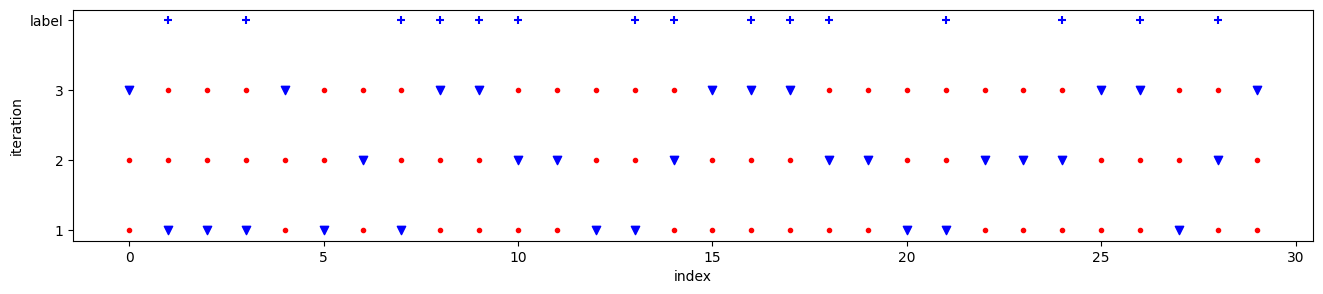

In [14]:
kk = [k*j for k,j in enumerate(y1) if j!=0]
k=1
plt.figure(figsize=(16,3))
for train_indices,test_indices in skf_cv:
    plt.scatter(train_indices,[k]*len(train_indices),marker=".",c="r")
    plt.scatter(test_indices,[k]*len(test_indices),marker="v",c="b")
    print("训练集索引-%d"%k,train_indices)
    print("测试集索引-%d"%k,test_indices)
    k+=1
plt.scatter(kk,[k]*len(kk),marker="+",c="b")   
plt.yticks([i for i in range(1,5)],["1","2","3","label"])
plt.ylabel("iteration")
plt.xlabel("index")

# 可视化乱序K次

In [15]:
shs=ShuffleSplit(n_splits=3,random_state=10,test_size=.1)

训练集索引-1 [ 2  3 21 13 27 12  1 19 14 18  6 11 23 24 28 22 10 26 29  8 25 16 17  0
 15  4  9]
测试集索引-1 [20  7  5]
训练集索引-2 [17  5 14 16 27 21 24 23  8  7  6  0  2 15  9 10 11 26 18  4  1 12 22 29
 25 19 13]
测试集索引-2 [20  3 28]
训练集索引-3 [16  3 17  5 23 27  1  9 26 19 14 25  0 11 10  6 21 13 15  8  2 22 12 18
 28 24  7]
测试集索引-3 [20  4 29]


Text(0.5, 0, 'index')

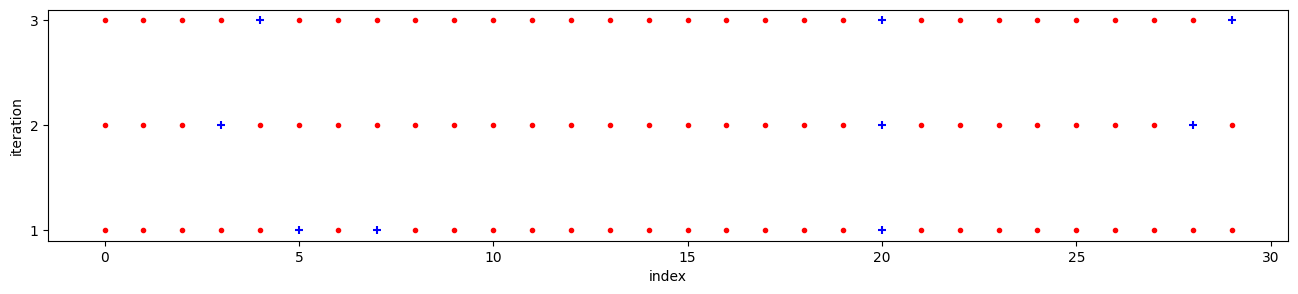

In [16]:
shs_cv = shs.split(X)
k = 1
plt.figure(figsize=(16,3))
for train_indices,test_indices in shs_cv:
    plt.scatter(train_indices,[k]*len(train_indices),marker=".",c="r")
    plt.scatter(test_indices,[k]*len(test_indices),marker="+",c="b")
    print("训练集索引-%d"%k,train_indices)
    print("测试集索引-%d"%k,test_indices)
    k+=1
    
plt.yticks([1,2,3],["1","2","3"])
plt.ylabel("iteration")
plt.xlabel("index")

# 留P法

In [17]:
from sklearn.model_selection import LeaveOneOut,LeavePOut

In [18]:
loo = LeaveOneOut()
lpo = LeavePOut

In [19]:
for i,j in loo.split(X):
    print(i,j)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20

# 自助法

In [20]:
XY_train = X.sample(50,replace=True)

In [21]:
xy_test = X.loc[data.index.difference(train_indices)].copy()

# 交叉验证

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [23]:
X= pd.DataFrame(X,columns=['Education'])

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 12 to 10
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [25]:
y = pd.DataFrame(y,columns=["Income"])

In [26]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 12 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Income  30 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


# 线性回归

In [27]:
# cross_val_score(LinearRegression(),X,y,cv=5)
cross_val_score(LinearRegression(),X,y,cv=5)

array([0.92700431, 0.86320122, 0.88340168, 0.9118669 , 0.96194243])

# 逻辑回归

In [28]:
from sklearn.linear_model import LogisticRegression

In [32]:
cross_val_score(LogisticRegression(),X,y1,cv=shs)

array([1., 1., 1.])

In [30]:
print(cross_val_score(LogisticRegression(),X,y1,cv=5))

[1. 1. 1. 1. 1.]


In [31]:
print(cross_val_score(LogisticRegression(),X,y1,cv=loo))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
